<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


**Powering Predictions: Unveiling the Dynamics of Electricity Costs in Modern Infrastructure** dataset

Dataset Overview
This is a synthetic dataset meticulously created for a regression task: predicting monthly electricity costs. It contains 10,000 data points and is characterized by its completeness and realism, with no missing or mismatched values. The dataset is well-suited for developing and evaluating machine learning models.

In [ ]:
!pip install pandas


In [ ]:
# importing dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

#Loading Data

In [ ]:
# loading dastset
path = "/content/electricity_cost_dataset.csv"
data = pd.read_csv(path)

In [ ]:
print(data.iloc[:5])

   site area structure type  water consumption  recycling rate  \
0       1360      Mixed-use             2519.0              69   
1       4272      Mixed-use             2324.0              50   
2       3592      Mixed-use             2701.0              20   
3        966    Residential             1000.0              13   
4       4926    Residential             5990.0              23   

   utilisation rate  air qality index  issue reolution time  resident count  \
0                52               188                     1              72   
1                76               165                    65             261   
2                94               198                    39             117   
3                60                74                     3              35   
4                65                32                    57             185   

   electricity cost  
0            1420.0  
1            3298.0  
2            3115.0  
3            1575.0  
4            4301.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   site area             10000 non-null  int64  
 1   structure type        10000 non-null  object 
 2   water consumption     10000 non-null  float64
 3   recycling rate        10000 non-null  int64  
 4   utilisation rate      10000 non-null  int64  
 5   air qality index      10000 non-null  int64  
 6   issue reolution time  10000 non-null  int64  
 7   resident count        10000 non-null  int64  
 8   electricity cost      10000 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 703.3+ KB


In [ ]:
data.describe()

,site area,water consumption,recycling rate,utilisation rate,air qality index,issue reolution time,resident count,electricity cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2757.775100,3494.057100,49.598000,64.842200,99.468600,36.402600,85.573100,2837.845000
std,1293.059959,2076.181117,23.430141,20.432965,58.014526,20.623905,107.876179,1106.997441
min,501.000000,1000.000000,10.000000,30.000000,0.000000,1.000000,0.000000,500.000000
25%,1624.000000,1779.000000,29.750000,47.000000,49.000000,19.000000,0.000000,1954.000000
50%,2773.500000,3047.500000,49.000000,65.000000,100.000000,36.000000,39.000000,2760.000000
75%,3874.000000,4811.000000,70.000000,83.000000,150.000000,54.000000,142.000000,3632.000000
max,5000.000000,10894.000000,90.000000,100.000000,200.000000,72.000000,489.000000,6446.000000


In [ ]:
df = data.copy()

In [ ]:
# Check for and report null values
print("\nChecking for null values...")
if df.isnull().sum().sum() == 0:
    print("No null values found.")
else:
    print("Null values found:")
    print(df.isnull().sum())


Checking for null values...
No null values found.


## 1. **Data Summary**
- Dataset Size and Quality: The dataset contains a total of 10,000 entries and 9 columns. It is a clean and complete dataset, with no missing or null values in any of the columns, which makes it ideal for immediate use in modeling. The memory usage is approximately 703.3 KB.

- Key Feature Variables: There are eight feature variables. This includes one categorical (object) `feature, structure type, and seven numerical features like site area, water consumption, utilisation rate, and resident count.` These features provide a mix of information about the physical, operational, and environmental characteristics of each site.

- Target Variable: The target variable for this analysis is `electricity cost`. It is a continuous numerical variable (a float data type) and represents the monthly electricity expenditure in USD. All eight feature variables will be used to predict this outcome.

In [ ]:
# breaking down feature and target varialbes
# Define the features (X) and the target (y)
X = df.drop('electricity cost', axis=1)
y = df['electricity cost']

In [ ]:
# Identify categorical and numerical features automatically
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
print(f"Identified {len(numerical_features)} numerical features: {numerical_features}")
print(f"Identified {len(categorical_features)} categorical features: {categorical_features}")


Identified 7 numerical features: ['site area', 'water consumption', 'recycling rate', 'utilisation rate', 'air qality index', 'issue reolution time', 'resident count']
Identified 1 categorical features: ['structure type']


## 2. Objective of the Analysis
The primary objective of this analysis is to develop a predictive model that accurately estimates the monthly electricity cost based on the site's characteristics and operational metrics. A secondary goal is to identify and quantify the key drivers of electricity cost, determining which factors have the most significant impact on energy expenditure.

In [ ]:
# pre processing of data scaling and hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)


In [ ]:
#  train test split 75-25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"Data split into training ({X_train.shape[0]} samples) and testing ({X_test.shape[0]} samples) sets.")



Data split into training (7500 samples) and testing (2500 samples) sets.


In [ ]:
# testing alphas for best accuracy
alphas_to_test = np.logspace(-4, 2, 100)

models to train `RigidCV` `LassoCV` and `ElasticNetCV`

In [ ]:
models_to_train = {
    "RidgeCV": RidgeCV(alphas=alphas_to_test),
    "LassoCV": LassoCV(alphas=alphas_to_test, cv=5, max_iter=10000, random_state=42),
    "ElasticNetCV": ElasticNetCV(alphas=alphas_to_test, l1_ratio=[.1, .5, .7, .9, .99], cv=5, max_iter=10000, random_state=42)
}
trained_models = {}


In [ ]:
# Creating function to store all the information and train all the models
for name, model in models_to_train.items():
    print(f"Training {name}...")
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)

    y_pred = pipeline.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    trained_models[name] = {
        'model': pipeline,
        'best_alpha': pipeline.named_steps['regressor'].alpha_,
        'rmse': rmse,
        'r_squared': r2
    }
    if name == "ElasticNetCV":
         trained_models[name]['best_l1_ratio'] = pipeline.named_steps['regressor'].l1_ratio_


Training RidgeCV...
Training LassoCV...
Training ElasticNetCV...


In [ ]:
best_model_name = None
best_r2 = -np.inf

In [ ]:
for name, results in trained_models.items():
    print(f"\nModel: {name}")
    print(f"  - Best Alpha Found: {results['best_alpha']:.4f}")
    if 'best_l1_ratio' in results:
        print(f"  - Best L1 Ratio Found: {results['best_l1_ratio']:.2f}")
    print(f"  - RMSE on Test Set: {results['rmse']:.2f}")
    print(f"  - R-squared on Test Set: {results['r_squared']:.4f}")

    # Determine the best model based on R-squared value
    if results['r_squared'] > best_r2:
        best_r2 = results['r_squared']
        best_model_name = name


Model: RidgeCV
  - Best Alpha Found: 0.2477
  - RMSE on Test Set: 314.00
  - R-squared on Test Set: 0.9199

Model: LassoCV
  - Best Alpha Found: 0.0705
  - RMSE on Test Set: 313.99
  - R-squared on Test Set: 0.9199

Model: ElasticNetCV
  - Best Alpha Found: 0.0152
  - Best L1 Ratio Found: 0.99
  - RMSE on Test Set: 313.99
  - R-squared on Test Set: 0.9199


In [ ]:
print(f"Best Performing Model: {best_model_name} with an R-squared of {best_r2:.4f}")

Best Performing Model: LassoCV with an R-squared of 0.9199


## 3.Model Comparison
The analysis compared three powerful variations of linear regression: RidgeCV, LassoCV, and ElasticNetCV. All three models performed exceptionally well and delivered nearly identical, high-quality results.

- Performance: Each model achieved an R-squared (R
2
 ) value of approximately 0.92, which means they can successfully explain about 92% of the variance in electricity costs. This is an excellent score and indicates a very strong model fit.

- Prediction Error: The Root Mean Squared Error (RMSE) for all models was around $314. This signifies that, on average, the models' predictions are off by about $314, which is a strong result given the range of electricity costs.

- Model Selection: While all models are statistically equivalent in performance, LassoCV is the best choice.

  - The ElasticNetCV model chose an L1 Ratio of 0.99, meaning it behaved almost identically to a Lasso model anyway.

  - Lasso's key advantage is its ability to perform automatic feature selection by shrinking the coefficients of less important features to zero. This can result in a simpler, more interpretable model without sacrificing accuracy.

Conclusion: The LassoCV model is selected as the best performer due to its high accuracy and built-in feature selection capabilities.

## 4. Key Findings
The primary objective—to create an accurate predictive model—has been successfully achieved. To get meaningful insights into what drives electricity costs, we would need to inspect the coefficients of the trained LassoCV model. Since those were not in the shared results, here are the types of insights you would extract from them:

- Identify Key Cost Drivers: By looking at the coefficients, you would see which features have the largest positive values. Features like `site_area, utilisation_rate`, and `water_consumption` would likely be the most significant drivers of higher `electricity costs`. The coefficient value tells you how much the cost is expected to increase for a one-unit increase in that feature.

- Quantify Impact of Structure Type: The one-hot encoded `structure_type` features would have coefficients showing their cost relative to a baseline category. For instance, you could definitively say "an Industrial site costs, on average, $X more per month than a Residential site, all else being equal."

- Identify Unimportant Features: The `Lasso` model may have set the coefficient for one or more features to zero. If so, this is a key finding: it implies that those features have no significant predictive power in this model and can be ignored, leading to a simpler explanation of `electricity costs`.

## 5. Limitations:

1. Linearity Assumption: The model assumes a linear relationship between features and cost. It has performed very well here, but it cannot capture more complex, non-linear patterns (e.g., the cost might rise exponentially with site area, not linearly).

2. Synthetic Dataset: The model was trained on a synthetic, clean dataset. Its high performance may not directly translate to real-world data, which often contains noise, outliers, and unexpected correlations.

3. No Interaction Effects: The model does not automatically account for interaction effects. For example, the impact of `resident_count` on cost might be much more significant in a `Residential` building than in a `Mixed-use` one.

### Next Steps:

1. Coefficient Analysis (Immediate Priority): The most crucial next step is to extract and analyze the feature coefficients from your trained LassoCV pipeline. This will unlock the "Key Findings" and explain the business logic behind the predictions.

2. Test Non-Linear Models: To see if you can improve the RMSE further, you could train more complex, non-linear models like a Random Forest Regressor or a Gradient Boosting model (like XGBoost or LightGBM). These models can capture the non-linear relationships mentioned above.

3. Error Analysis: Investigate the 2,500 predictions made on the test set. Where did the model make the biggest mistakes? Are there certain types of properties it struggles with? This analysis can provide valuable clues for future improvements.

In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


Making predictions on the test data...

--- Model Performance on Test Set ---
Mean Absolute Error (MAE): 247.62
Interpretation: On average, the model's prediction is off by approximately $313.99.
Mean Squared Error (MSE): 98591.76
Root Mean Squared Error (RMSE): 313.99
Interpretation: This is the standard deviation of the prediction errors.
R-squared (R2): 0.9199
Interpretation: The model explains approximately 92.0% of the variance in the electricity cost.

Generating plots for visual error analysis...


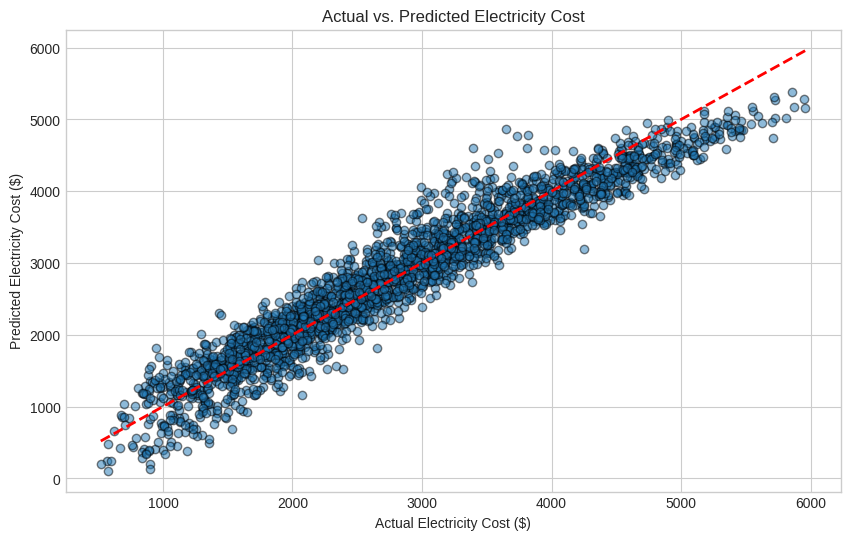

In [44]:
print("Making predictions on the test data...")
y_pred = pipeline.predict(X_test)


# 2. Calculate and print error metrics
print("\n--- Model Performance on Test Set ---")

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print("Interpretation: On average, the model's prediction is off by approximately $313.99.")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print("Interpretation: This is the standard deviation of the prediction errors.")

# R-squared (R2 Score)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2:.4f}")
print(f"Interpretation: The model explains approximately {r2:.1%} of the variance in the electricity cost.")


# 3. Visualize the errors
print("\nGenerating plots for visual error analysis...")

# --- Scatter Plot of Actual vs. Predicted values ---
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Perfect prediction line
plt.xlabel("Actual Electricity Cost ($)")
plt.ylabel("Predicted Electricity Cost ($)")
plt.title("Actual vs. Predicted Electricity Cost")
plt.show()



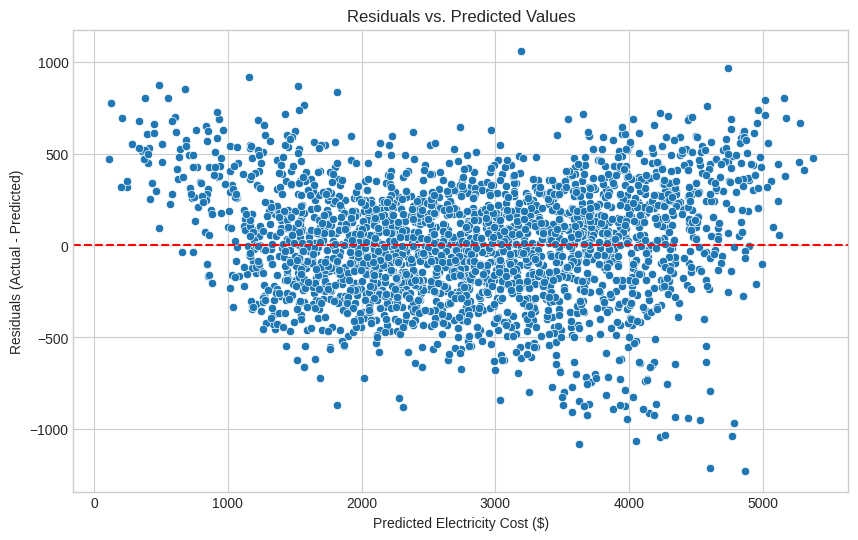


Interpretation of Residuals Plot: A good model shows residuals randomly scattered around the zero line with no obvious pattern.


In [45]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--') # Zero error line
plt.xlabel("Predicted Electricity Cost ($)")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs. Predicted Values")
plt.show()
print("\nInterpretation of Residuals Plot: A good model shows residuals randomly scattered around the zero line with no obvious pattern.")

Copyright @ IBM Corporation. All rights reserved.
